In [9]:
import numpy as np

from astropy.table import Table

from scipy.stats import binned_statistic

import pickle

import matplotlib.pyplot as plt

In [5]:
def profile_histogram(x, y, xbins, yerr=None, weights=None, median=False, weighted=False):
    """Compute a profile histogram from scattered data.
    
    Parameters
    ----------
    x : list or ndarray
        Ordinates (independent variable).
    y : list or ndarray
        Coordinates (dependent variable).
    xbins : list or ndarray
        Bin edges for the independent variable.
    yerr : list or ndarray
        Uncertainties on the dependent variable. Assumed independent.
    weights : list or ndarray
        If not None (and weighted=True), will use this instead of yerr to weight 
        the summary statistics.
    median : bool
        If true, compute median as central value; else, the (weighted) mean.
    weighted : bool
        Weight the summary statistics, either by the uncertainty in y or the 
        provided weights.
        
    Returns
    -------
    N : ndarray
        Unweighted counts per bin.
    h : ndarray
        Summary statistic (mean or median) of independent variable per bin.
    e : ndarray
        Uncertainty on the summary statistic per bin.
    """
    
    N = binned_statistic(x, y, bins=xbins, statistic='count').statistic

    if weighted:
        if (yerr is None) and (weights is None):
            raise ValueError('need to define either yerr or weights if using weighted fit.')

        if weights is None:
            # weight based on yerr
            w = 1/yerr**2
        else:
            w = weights
        W, H, E = binned_statistic(x, [w, w*y, w*y**2], bins=xbins, statistic='sum').statistic
        h = H/W
        e = 1/np.sqrt(W)
    else:
        mean, mean2 = binned_statistic(x, [y, y**2], bins=xbins, statistic='mean').statistic
        h = mean
        e = np.sqrt((mean2 - mean**2) / (N - 1))

    if median:
        h = binned_statistic(x, y, bins=xbins, statistic='median').statistic
    
    return N, h, e

# Data

In [10]:
temp_infile = open('DESI-DR1_TF_pv_cat_v10_cut.pkl', 'rb')

SGA_TF = pickle.load(temp_infile)

temp_infile.close()

In [11]:
SGA_TF

,Unnamed: 0,SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,...,MU_TF_ERR,LOGDIST,LOGDIST_ERR,V_PEC,VERR_PEC,MU_ALEX,MU_ALEX_ERR,MU_ALEX_32,MU_ALEX_50,MU_ALEX_68
0,0,38.0,b'SGA-2020 38',b'SDSSJ140638.88+393138.1',3558705,211.661940,39.527234,b'S?',81.63,0.353183,...,0.276323,-0.030831,0.055265,-1701.846623,3029.451092,37.282214,0.393007,37.103904,37.28335,37.471864
1,1,55.0,b'SGA-2020 55',b'PGC1203947',1203947,199.730613,1.726355,b'S?',159.49,0.351560,...,0.316939,-0.074701,0.063388,-2298.319999,1957.247643,35.705893,0.663567,35.479612,35.78775,36.039864
2,2,117.0,b'SGA-2020 117',b'2MASXJ09154446+0241407',3354886,138.935384,2.694773,b'S?',128.28,0.399025,...,0.250026,-0.070946,0.050006,-4352.263088,3082.092359,-87.172903,222.995429,37.335476,37.66425,37.881856
3,3,223.0,b'SGA-2020 223',b'SDSSJ131108.84+341016.9',4358531,197.786926,34.171388,b'S?',134.47,0.440555,...,0.502708,-0.048961,0.100542,-1168.083546,2407.974315,36.266621,0.386055,36.104872,36.28215,36.452332
4,4,581.0,b'SGA-2020 581',b'PGC1576398',1576398,118.859673,18.975514,b'Sm',106.28,0.354813,...,0.291640,-0.065449,0.058329,-1968.890154,1762.409677,26.614166,7.129028,23.053800,23.10090,23.150400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,3100,428616.0,b'SGA-2020 428616',b'PGC2700988',2700988,116.010583,67.498833,NaN,150.00,0.371535,...,0.291178,0.036599,0.058236,1807.525333,2889.744163,37.573919,0.330706,37.422872,37.57135,37.724332
2643,3101,428657.0,b'SGA-2020 428657',b'PGC1059636',1059636,163.517559,-4.337635,NaN,81.00,0.371535,...,0.301289,0.110906,0.060258,5100.115736,2759.541268,26.465938,0.993026,25.835000,26.46060,27.085700
2644,3102,428732.0,b'SGA-2020 428732',b'PGC1114204',1114204,216.861675,-1.628457,NaN,115.11,0.341979,...,0.141295,-0.089001,0.028259,-5396.252728,1694.529176,36.250415,0.390595,36.073868,36.25955,36.443432
2645,3103,428922.0,b'SGA-2020 428922',b'PGC1310891',1310891,21.794625,6.957667,NaN,162.50,0.398107,...,0.221320,-0.084800,0.044264,-4623.607517,2404.520204,35.222926,1.059173,35.016280,35.41480,35.742400


In [13]:
SGA_TF_table = Table.from_pandas(SGA_TF)
SGA_TF_table.write('DESI-DR1_TF_pv_cat_v10_cut.txt', format='ascii.commented_header')

# $\eta$ v. redshift

In [6]:
SGA_TF['LOGDIST_ALEX'] = 0.2*(SGA_TF['MU_ZCMB'] - SGA_TF['MU_ALEX'])
SGA_TF['LOGDIST_ALEX_ERR'] = 0.2*np.sqrt(SGA_TF['MU_ZCMB_ERR']**2 + SGA_TF['MU_ALEX_ERR']**2)

/var/folders/mg/fxh1s24d0n3_r0c39d3gs0g00000gq/T/ipykernel_15923/3818747994.py:45: RuntimeWarning: invalid value encountered in divide
  h = H/W
/var/folders/mg/fxh1s24d0n3_r0c39d3gs0g00000gq/T/ipykernel_15923/3818747994.py:46: RuntimeWarning: divide by zero encountered in divide
  e = 1/np.sqrt(W)


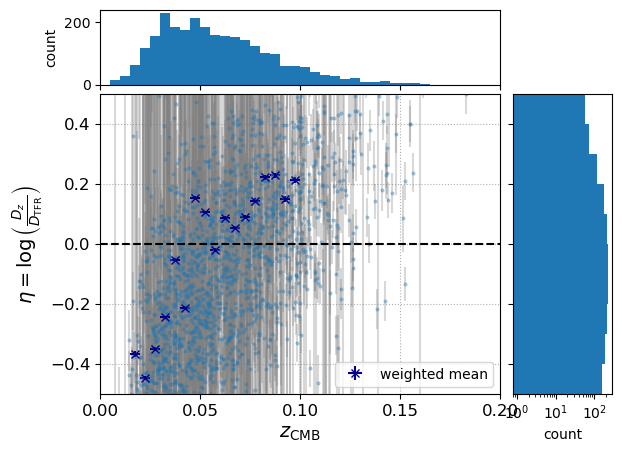

In [7]:
zbins = np.arange(0, 0.105, 0.005)
dz = 0.5*np.diff(zbins)
zc = 0.5*(zbins[1:] + zbins[:-1])


fig = plt.figure()

gs = fig.add_gridspec(2, 2, width_ratios=(4,1), height_ratios=(1,4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])

ax.errorbar(SGA_TF['Z_DESI_CMB'], 
             SGA_TF['LOGDIST_ALEX'], 
             xerr=SGA_TF['ZERR_DESI'], 
             yerr=SGA_TF['LOGDIST_ALEX_ERR'],
             fmt='.', 
             markersize=4, 
             alpha=0.3, 
             ecolor='gray')

# Plot the weighted mean
N, y_avg, y_std = profile_histogram(SGA_TF['Z_DESI_CMB'], 
                                    SGA_TF['LOGDIST_ALEX'], 
                                    zbins, 
                                    weights=SGA_TF['LOGDIST_ALEX_ERR']**-2, 
                                    weighted=True)
ax.errorbar(zc, y_avg, xerr=dz, yerr=y_std, fmt='x', color='darkblue', label='weighted mean')

# Line at eta = 0
ax.hlines(0, 0, 0.2, linestyles='dashed', colors='k', zorder=5)

ax.legend()

ax.grid(ls=':')

plt.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel(r'$z_{\text{CMB}}$', fontsize=14)
ax.set_ylabel(r'$\eta = \log \left( \frac{D_z}{D_{\text{TFR}}} \right)$', fontsize=14)

# ax.set_ylim((-1.9, 1.9))
ax.set_xlim((0, 0.2))
ax.set_ylim((-0.5, 0.5))
# ax.set_ylim((-0.2, 0))
# ax.set_xlim((0, 0.1))

ax.grid(ls=':')


ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
ax_histx.hist(SGA_TF['Z_DESI_CMB'], 
              bins=np.arange(0, 0.175, 0.005))


ax_histx.tick_params(axis='x', labelbottom=False)
ax_histx.set_ylabel('count')


ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
ax_histy.hist(SGA_TF['LOGDIST_ALEX'], 
              bins=np.arange(-2, 2, 0.1), 
              orientation='horizontal')


ax_histy.set_xscale('log')
ax_histy.tick_params(axis='y', labelleft=False)
ax_histy.set_xlabel('count');

# plt.savefig('../../Figures/Y1/iron_logdist-v-z_jointTFR-varyV0-perpdwarfs_z0p1_Anthony2_weightsVmax-1_dVsys_20250717.png', 
#             dpi=150, 
#             facecolor='none', 
#             bbox_inches='tight');